In [1]:
import pandas as pd

x = [0,1,2,3,4,5,6,7,8,9]
y = [1,3,2,5,7,8,8,9,10,12]

dict = {'X': x, 'Y': y}

df = pd.DataFrame(dict)

df.to_csv('data_points.csv')

In [2]:
data = pd.read_csv('data_points.csv')
print(data.shape)
data.head()

(10, 3)


,Unnamed: 0,X,Y
0,0,0,1
1,1,1,3
2,2,2,2
3,3,3,5
4,4,4,7


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#collecting x and y values
X = data['X'].values
Y = data['Y'].values

In [45]:
print(X)

[0 1 2 3 4 5 6 7 8 9]


In [46]:
print(Y)

[ 1  3  2  5  7  8  8  9 10 12]


In [47]:
mean_X = np.mean(X)
print(mean_X)

4.5


In [48]:
mean_Y = np.mean(Y)
print(mean_Y)

6.5


In [49]:
n = len(X)
print(n)

10


In [50]:
# m = (x-mean_x)(y-mean_y)/(x-mean_x)^2;

numerator = 0;
denominator = 0;

for i in range(n):
    numerator+=(X[i] - mean_X)*(Y[i] - mean_Y)
    denominator+=(X[i] - mean_X)**2
m = numerator/denominator
c = mean_Y - (m * mean_X)

print(m,c)

1.1696969696969697 1.2363636363636363


In [51]:
#lets visualize our regression line

max_X = np.max(X);
print(max_X)

9


In [52]:
min_X = np.min(X);
print(min_X)

0


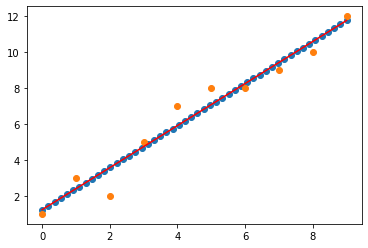

In [53]:
#generating 50 values between min_x and max_x

x = np.linspace(min_X,max_X,50)
#print(x)

#regression line for above 50 points
y = m*x + c
#print(y)


plt.plot(x,y,"red")
plt.scatter(x,y)
plt.scatter(X,Y)

In [62]:
# to find the goodness of our model we use R^2 method
# R^2 = 1 - (ss_r/ss_t)
#ss_r = sum of squares of residual errors
#ss_t = total sum of errors

ss_r = 0;
ss_t = 0;

for i in range(n):
    pred_y = m*X[i] + c
    ss_t=(Y[i] - mean_Y)**2
    ss_r=(Y[i] - pred_y)**2
    
# to scale between 0 and 1
r2 = 1 - (ss_r/ss_t)
print(r2)
# higher the value of r2 better the model

[0.99815313]


In [61]:
# using scikit learn library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# reshaping x1 matrix to n rows and 1 column
X = X.reshape((n,1))

# regression model
reg = LinearRegression()

# fitting training data
reg = reg.fit(X,Y)

#prediction
y_pred = reg.predict(X)
print(y_pred)

# Root mean squared error and R^2 score
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)

print(r2_score)



[ 1.23636364  2.40606061  3.57575758  4.74545455  5.91515152  7.08484848
  8.25454545  9.42424242 10.59393939 11.76363636]
0.952538038613988
